In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder,RobustScaler
from sklearn.metrics import confusion_matrix
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing  import FunctionTransformer
np.set_printoptions(precision=3, suppress=True)
import warnings
warnings.filterwarnings("ignore")

In [4]:
dataset=pd.read_csv("us_constructions.csv")
dataset.shape

(6170627, 47)

In [5]:
dataset.dropna(subset=["Sunrise_Sunset", "Civil_Twilight"], inplace=True)
dataset.reset_index(inplace=True,drop=True) 
X,y= dataset.iloc[:, :-1], dataset.iloc[:, -1]

In [6]:
X_cat=dataset.loc[:,["Sunrise_Sunset", "Civil_Twilight"]]
X_cat.isna().sum()

Sunrise_Sunset    0
Civil_Twilight    0
dtype: int64

In [7]:
X

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight
0,C-1,4,2019-04-05 16:00:00.000000000,2020-09-29 11:53:57.000000000,32.838360,-93.152378,32.850740,-93.164388,1.103497,Construction on LA-534 WB near EDMONDS LOOP Ro...,...,False,False,False,False,False,False,False,Day,Day,Day
1,C-2,2,2021-11-12 07:59:00.000000000,2021-11-12 08:22:30.000000000,30.221331,-92.008625,30.216642,-92.003809,0.433173,Slow traffic on US-90 E from US-167/Louisiana ...,...,False,False,False,False,False,False,False,Day,Day,Day
2,C-3,2,2021-10-12 07:17:30.000000000,2021-10-12 09:18:55.000000000,39.653153,-104.910224,39.653120,-104.913838,0.192266,Slow traffic on CO-30 from S Tamarac Dr (E Ham...,...,False,False,True,False,False,False,False,Day,Day,Day
3,C-4,4,2021-02-10 02:46:10.000000000,2021-02-17 23:59:00.000000000,33.961506,-118.029339,33.961919,-118.029082,0.032112,Closed road from Whittier to College Ave due t...,...,False,False,False,False,False,False,False,Night,Night,Night
4,C-5,2,2020-09-24 15:58:00.000000000,2020-09-25 21:04:54.000000000,40.008734,-79.599696,40.022822,-79.595703,0.996057,Construction on US-119 NB near SAMPSON ST Allo...,...,False,False,False,False,False,False,False,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6170027,C-6293072,2,2020-01-10 10:39:00,2021-10-19 01:02:59,40.136791,-74.962677,40.128850,-74.969085,0.644691,Roadwork on US 1 southbound between Exit 351: ...,...,False,False,False,False,False,False,False,Day,Day,Day
6170028,C-6293073,2,2020-01-29 21:00:00,2020-01-30 05:00:00,37.806690,-122.474869,NaN,NaN,3.040000,Two lanes closed due to construction on US-101...,...,False,False,False,False,False,False,False,Night,Night,Night
6170029,C-6293074,2,2021-09-04 10:54:51,2021-09-04 15:06:46,40.758288,-73.994419,40.758568,-73.992984,0.077554,Slow traffic from Lincoln Tunl W to 9th Ave du...,...,False,False,True,False,False,True,False,Day,Day,Day
6170030,C-6293075,2,2021-12-07 16:15:49,2021-12-07 18:34:49,29.698476,-95.427386,29.697288,-95.425727,0.129042,Stationary traffic at Aberdeen Way due to road...,...,False,False,False,True,False,False,False,Day,Day,Day


In [8]:
y.head()

0      Day
1      Day
2      Day
3    Night
4      Day
Name: Astronomical_Twilight, dtype: object

In [9]:
X.isna().sum()

ID                         0
Severity                   0
Start_Time                 0
End_Time                   0
Start_Lat                  0
Start_Lng                  0
End_Lat               634009
End_Lng               634009
Distance(mi)               0
Description                0
Number               2674383
Street                     6
Side                       0
City                       0
County                     0
State                      0
Zipcode                 2067
Country                    0
Timezone                4829
Airport_Code           15581
Weather_Timestamp      83498
Temperature(F)        115106
Wind_Chill(F)         776233
Humidity(%)           122271
Pressure(in)          104029
Visibility(mi)        141958
Wind_Direction        162260
Wind_Speed(mph)       339966
Precipitation(in)     922096
Weather_Condition     137911
Amenity                    0
Bump                       0
Crossing                   0
Give_Way                   0
Junction      

In [10]:
X_num=X.loc[:,["Precipitation(in)", "Wind_Chill(F)"]]
imp_median = SimpleImputer(strategy='median')
X_num.iloc[:,:]=imp_median.fit_transform(X_num.iloc[:,:])
X_num.isna().sum()

Precipitation(in)    0
Wind_Chill(F)        0
dtype: int64

In [11]:
sc=StandardScaler()

X_num.iloc[:,:]=sc.fit_transform(X_num.iloc[:,:])
X_num

,Precipitation(in),Wind_Chill(F)
0,-0.038828,0.659139
1,-0.038828,-0.395418
2,-0.038828,-1.555430
3,-0.038828,-0.448145
4,-0.038828,0.553683
...,...,...
6170027,-0.038828,-1.133607
6170028,-0.038828,-0.448145
6170029,-0.038828,0.448228
6170030,-0.038828,0.237316


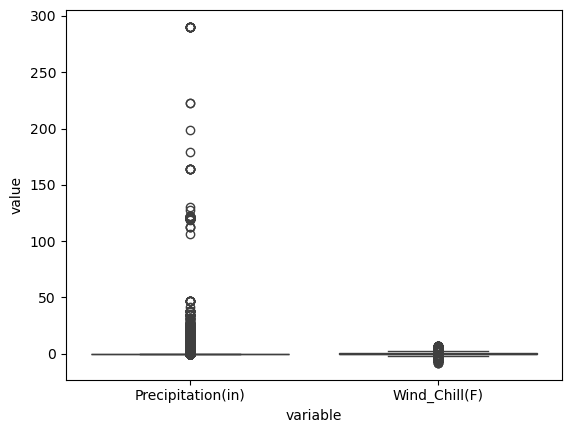

In [12]:
sns.boxplot(x="variable", y="value", data=pd.melt(X_num))

plt.show()

In [13]:
Outliers=X_num[(~X_num["Precipitation(in)"].between(-10,10)) | (~X_num["Wind_Chill(F)"].between(-10,10))]
Outliers.count()

Precipitation(in)    1682
Wind_Chill(F)        1682
dtype: int64

In [14]:
X_num=X_num[(X_num["Precipitation(in)"].between(-10,10)) & (X_num["Wind_Chill(F)"].between(-10,10))]
X_num

,Precipitation(in),Wind_Chill(F)
0,-0.038828,0.659139
1,-0.038828,-0.395418
2,-0.038828,-1.555430
3,-0.038828,-0.448145
4,-0.038828,0.553683
...,...,...
6170027,-0.038828,-1.133607
6170028,-0.038828,-0.448145
6170029,-0.038828,0.448228
6170030,-0.038828,0.237316


In [16]:
X_cat=X.loc[:,["Sunrise_Sunset", "Civil_Twilight"]]
onehotenc=OneHotEncoder(sparse_output=False,handle_unknown='ignore')

X_cat_emb=onehotenc.fit_transform(X_cat.loc[:,["Sunrise_Sunset"]])
one_hot_df = pd.DataFrame(X_cat_emb, columns=onehotenc.get_feature_names_out(["Sunrise_Sunset"]))

df_encoded = pd.concat([X_cat, one_hot_df], axis=1)

df_encoded = df_encoded.drop(["Sunrise_Sunset"], axis=1)
df_encoded 

,Civil_Twilight,Sunrise_Sunset_Day,Sunrise_Sunset_Night
0,Day,1.0,0.0
1,Day,1.0,0.0
2,Day,1.0,0.0
3,Night,0.0,1.0
4,Day,1.0,0.0
...,...,...,...
6170027,Day,1.0,0.0
6170028,Night,0.0,1.0
6170029,Day,1.0,0.0
6170030,Day,1.0,0.0


In [17]:
df_encoded['Civil_Twilight']=df_encoded.Civil_Twilight.map({'Day':0,'Night':1})
df_encoded 

,Civil_Twilight,Sunrise_Sunset_Day,Sunrise_Sunset_Night
0,0,1.0,0.0
1,0,1.0,0.0
2,0,1.0,0.0
3,1,0.0,1.0
4,0,1.0,0.0
...,...,...,...
6170027,0,1.0,0.0
6170028,1,0.0,1.0
6170029,0,1.0,0.0
6170030,0,1.0,0.0


In [18]:
onehotenc=OneHotEncoder(sparse_output=False,handle_unknown='ignore')

X_cat_emb=onehotenc.fit_transform(X_cat.loc[:,["Sunrise_Sunset"]])
one_hot_df = pd.DataFrame(X_cat_emb, columns=onehotenc.get_feature_names_out(["Sunrise_Sunset"]))

df_encoded = pd.concat([X_cat, one_hot_df], axis=1)

df_encoded = df_encoded.drop(["Sunrise_Sunset"], axis=1)
df_encoded

,Civil_Twilight,Sunrise_Sunset_Day,Sunrise_Sunset_Night
0,Day,1.0,0.0
1,Day,1.0,0.0
2,Day,1.0,0.0
3,Night,0.0,1.0
4,Day,1.0,0.0
...,...,...,...
6170027,Day,1.0,0.0
6170028,Night,0.0,1.0
6170029,Day,1.0,0.0
6170030,Day,1.0,0.0


In [19]:
df_encoded['Civil_Twilight']=df_encoded.Civil_Twilight.map({'Day':0,'Night':1})
df_encoded.isna().sum()

Civil_Twilight          0
Sunrise_Sunset_Day      0
Sunrise_Sunset_Night    0
dtype: int64

In [20]:
df_encoded['Civil_Twilight'].value_counts() 

Civil_Twilight
0    4275365
1    1894667
Name: count, dtype: int64

In [21]:
df_encoded2=SelectPercentile(chi2, percentile=70).fit_transform(df_encoded, y)
df_encoded2

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [1., 1.]])

In [22]:
X=X.loc[:,[ "State", "Distance(mi)","Severity", "Traffic_Calming", "Railway"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
numeric_features = ["Distance(mi)", "Severity"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ["Traffic_Calming", "State", "Railway"]
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=70)),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [24]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

In [25]:
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))
clf

model score: 0.780


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Distance(mi)', 'Severity']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('selector',
                                                                   SelectPercentile(percentile=70,
                                                                                    score_func=<function chi2 at 0x168ba7b00>))]),
                                                  ['Traffic_Calming', 'State',
                                                   'Railway'])])),
                ('classifier', LogisticRegression())])

In [26]:
y_pred=clf.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[949876,  14504],
       [256729,  12898]])

In [27]:
n_samples=40
Lambda=0.001

X = np.random.rand(n_samples)
y=np.cos(1.5 * np.pi * X)+0.5*np.random.rand(n_samples)
X=X.reshape(-1,1)

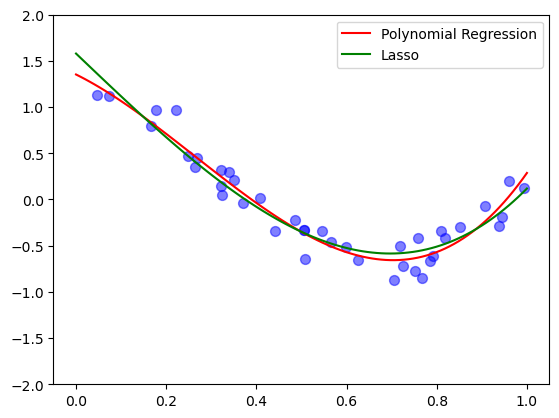

In [28]:
polymodel = PolynomialFeatures(degree=3, include_bias=True)
data=polymodel.fit_transform(X)
model1=LinearRegression()
model2=Lasso(alpha=Lambda)


model1.fit(data,y) 
model2.fit(data,y) 


X_plot=np.linspace(0,1,100).reshape(-1,1)
X_plot_poly=polymodel.transform(X_plot)
fig=plt.figure()
plt.scatter(X,y, c='b', s=50, alpha=.5)
plt.plot(X_plot,model1.predict(X_plot_poly),'-r', label='Polynomial Regression')
plt.plot(X_plot,model2.predict(X_plot_poly),'-g', label='Lasso')
plt.legend()
plt.ylim(-2,2)
fig.show()

In [29]:
y_pred1=model1.predict(polymodel.transform(X))
y_pred2=model2.predict(polymodel.transform(X))

Loss1=((y_pred1-y)**2).mean() +  Lambda*(np.abs(model1.coef_)).sum()
Loss2=((y_pred2-y)**2).mean() +  Lambda*(np.abs(model2.coef_)).sum()
Loss1,Loss2
print(f' Loss of Poly. Reg. Model with L1 Reg= {Loss1:.3f} \n Loss of Lasso Model with L1 Reg = {Loss2:.3f}')
print(f' Weights of Poly. Reg. Model= {model1.coef_[1:]} \n Weights of Lasso Model= {model2.coef_[1:]}')

 Loss of Poly. Reg. Model with L1 Reg= 0.034 
 Loss of Lasso Model with L1 Reg = 0.032
 Weights of Poly. Reg. Model= [-2.416 -5.315  6.666] 
 Weights of Lasso Model= [-4.659 -0.     3.198]


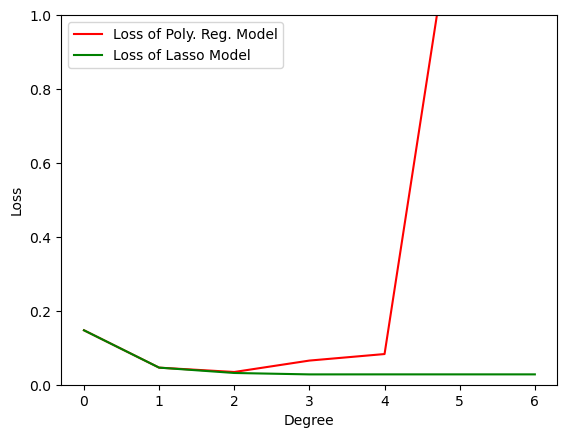

In [30]:
Loss1, Loss2= [],[]

for deg in range(1,8):
    polymodel = PolynomialFeatures(degree=deg, include_bias=True)
    data=polymodel.fit_transform(X)
    model1=LinearRegression()
    model2=Lasso(alpha=Lambda)
    
    
    model1.fit(data,y) 
    model2.fit(data,y) 
  
    y_pred1=model1.predict(polymodel.transform(X))
    y_pred2=model2.predict(polymodel.transform(X))
    
    Loss1.append(((y_pred1-y)**2).mean() +  Lambda*(np.abs(model1.coef_)).sum())
    Loss2.append(((y_pred2-y)**2).mean() +  Lambda*(np.abs(model2.coef_)).sum())

fig=plt.figure()
xv=np.arange(0,deg)
plt.plot(xv,Loss1,'-r', label='Loss of Poly. Reg. Model')
plt.plot(xv,Loss2,'-g', label='Loss of Lasso Model')
plt.ylim(0,1)
plt.ylabel("Loss")
plt.xlabel('Degree')
plt.legend()
plt.show()

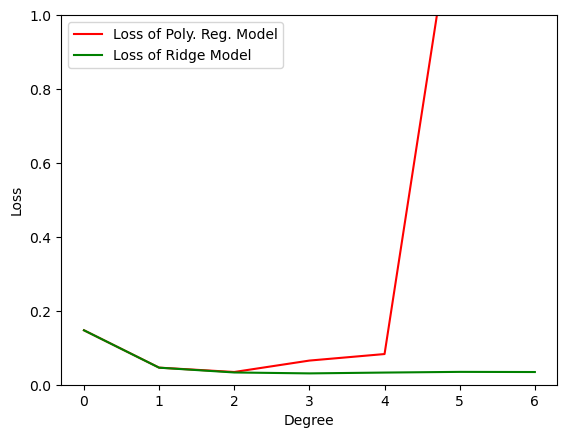

In [31]:
Loss1, Loss2= [],[]

for deg in range(1,8):
    polymodel = PolynomialFeatures(degree=deg, include_bias=True)
    data=polymodel.fit_transform(X)
    model1=LinearRegression()
    model2=Ridge(alpha=Lambda)
    
    
    model1.fit(data,y) 
    model2.fit(data,y) 
  
    y_pred1=model1.predict(polymodel.transform(X))
    y_pred2=model2.predict(polymodel.transform(X))
    
    Loss1.append(((y_pred1-y)**2).mean() +  Lambda*(np.abs(model1.coef_)).sum())
    Loss2.append(((y_pred2-y)**2).mean() +  Lambda*(np.abs(model2.coef_)).sum())

fig=plt.figure()
xv=np.arange(0,deg)
plt.plot(xv,Loss1,'-r', label='Loss of Poly. Reg. Model')
plt.plot(xv,Loss2,'-g', label='Loss of Ridge Model')
plt.ylim(0,1)
plt.ylabel("Loss")
plt.xlabel('Degree')
plt.legend()
plt.show()